In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\Apple\\AAPL(ClosingVal-tomorrow).csv")

In [30]:
df.head()

Date      Open      High       Low      Volume     Close
0  1/2/1998  0.121652  0.145089  0.120536   718110400  0.141741
1  1/5/1998  0.147321  0.147879  0.135603   651873600  0.169085
2  1/6/1998  0.142299  0.178571  0.131696  1812473600  0.156250
3  1/7/1998  0.167969  0.169643  0.154576  1041622400  0.162388
4  1/8/1998  0.155692  0.166295  0.151228   774020800  0.162388

In [31]:
df.tail()

Date        Open        High         Low     Volume       Close
5839  3/18/2021  122.879997  123.180000  120.320000  121229700  119.989998
5840  3/19/2021  119.900002  121.430000  119.680000  185023200  123.389999
5841  3/22/2021  120.330002  123.870003  120.260002  111912300  122.540001
5842  3/23/2021  123.330002  124.239998  122.139999   95467100  120.089996
5843  3/24/2021  122.820000  122.900002  120.070000   88530500  120.589996

In [32]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [33]:
df.shape

(5844, 6)

In [34]:
del df['Date']

In [35]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
xtrain.shape

(4675, 4)

In [38]:
ytrain.shape

(4675,)

In [39]:
xtest.shape

(1169, 4)

In [40]:
ytest.shape

(1169,)

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [43]:
rf_predictions = rf.predict(xtest)
rf_predictions

array([ 5.19399285,  0.38468511,  0.36752031, ..., 47.67379963,
       42.83352431, 51.69815003])

In [44]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, rf_predictions)))
print('Mean Directional Accuracy:', mda(ytest, rf_predictions))

Mean Absolute Error: 0.28909170241231785
Mean Squared Error: 0.4972986463356127
Root Mean Squared Error: 0.7051940487097241
Mean Directional Accuracy: 0.9914383561643836


### Predicting for 7th April using 6th Open, High, Low, Volume 

In [46]:
rf.predict([[126.5,127.13,125.65,79463200]])

array([125.43910012])

### Graph

In [47]:
import matplotlib.pyplot as plt

In [48]:
newdf=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\Apple\\Apple(DataFrom26March)-Tomorrow.csv")

In [49]:
newdf.head()

Date        Open        High         Low     Volume       Close
0  26-Mar-21  120.349998  121.480003  118.919998   93958900  121.389999
1  29-Mar-21  121.650002  122.580002  120.730003   80819200  119.900002
2  30-Mar-21  120.110001  120.400002  118.860001   85671900  122.150002
3  31-Mar-21  121.650002  123.519997  121.150002  118323800  123.000000
4   1-Apr-21  123.660004  124.180000  122.489998   74957400  125.900002

In [50]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [51]:
predictions = rf.predict(newxval)

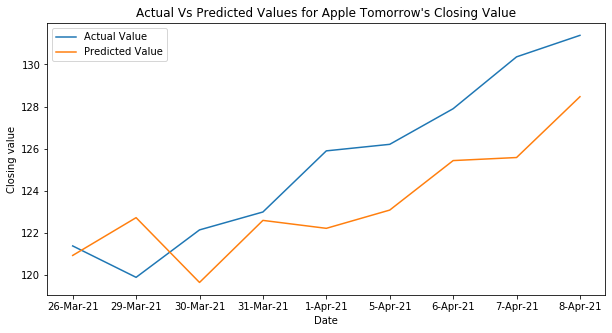

In [52]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for Apple Tomorrow's Closing Value")
plt.legend()